## Import Python built-in functions we need to run and plot the game

In [49]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb

### Set up inline matplotlib
This tells Python to plot the figure right in here, in the notebook.

In [50]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Import Game Modules From a Given Path
User have to edit the path and put the correct one on his/her machine.

In [51]:
import sys
# search path for modules
sys.path.append('/Users/hn/Documents/GitHub/PyOpinionGame/')

import opiniongame.config as og_cfg
import opiniongame.IO as og_io
import opiniongame.coupling as og_coupling
import opiniongame.state as og_state
import opiniongame.adjacency as og_adj
import opiniongame.selection as og_select
import opiniongame.potentials as og_pot
import opiniongame.core as og_core
import opiniongame.stopping as og_stop
import opiniongame.opinions as og_opinions

## Setting Up Game Parameters

In [77]:
config = og_cfg.staticParameters()

path = '/Users/hn/Documents/GitHub/PyOpinionGame/'  # path to the 'staticParameters.cfg'
staticParameters = path + 'staticParameters.cfg'

config.readFromFile(staticParameters)
config.threshold = 0.0001
config.Kthreshold = 0.00001
config.startingseed = 11
config.learning_rate = 0.1
tau = 0.62 #tip of the tent potential function
config.printOut()

StaticParameters:
Learning rate     = 0.1
Unique. strength  = 0.0
Skew. strength  = 0.0
NumExperiments    = 100
PopSize           = 20
Threshold         = 0.0001
Hthreshold        = 1e-06
Kthreshold        = 1e-05
ntopics           = 1
startingSeed      = 11
iterationmax      = 1000



In [78]:
# seed PRNG: must do this before any random numbers are ever sampled during default generation

In [79]:
print("SEEDING PRNG: "+str(config.startingseed))
np.random.seed(config.startingseed)

SEEDING PRNG: 11


# Set up the state of the system
### State of the system includes:
- Weight Matrix (Matrix of the coupling wieghts between topic)
- Initial Opinions of agents
- Adjacency matrix of the network

In [80]:
# These are the default matrices for the state of the system:
# If you want to change them, you can generate a new one in the following cell
default_weights = og_coupling.weights_no_coupling(config.popSize, config.ntopics)
default_initialOpinions = og_opinions.initialize_opinions(config.popSize, config.ntopics)
default_adj = og_adj.make_adj(config.popSize, 'full')

## User Defined States and parameters Can go in the following cell:

In [81]:
config.ntopics = 2
config.iterationmax = 500
config.no_of_experiments = 1

user_weights = og_coupling.weights_no_coupling(config.popSize, config.ntopics)
user_initialOpinions = og_opinions.initialize_opinions(config.popSize, config.ntopics)
user_adj = og_adj.make_adj(config.popSize, 'full')

In [118]:
state = og_state.WorldState(adj=user_adj, 
                            couplingWeights=user_weights, 
                            initialOpinions=user_initialOpinions, 
                            initialHistorySize=100, 
                            historyGrowthScale=2)
state.validate()
ufuncs = og_cfg.UserFunctions(og_select.FastPairSelection,
                              og_stop.iterationStop,
                              og_pot.createTent(tau))

WEIGHT SHAPE   : (20, 2, 2)
OPINION SHAPE  : (20, 2)
ADJACENCY SHAPE: (20, 20)
==> World state validation passed.



In [120]:
#
# run the game
#
state = og_core.run_until_convergence(config, state, ufuncs)
# Extract and save the history of the game
rdict = {}
rdict['history'] = state.history
og_io.saveMatrix('output.mat', rdict)

In [121]:
time, population_size, no_of_topics = rdict['history'].shape
topic1_evolution = rdict['history'][:,:,0].reshape(time, population_size)
topic2_evolution = rdict['history'][:,:,1].reshape(time, population_size)

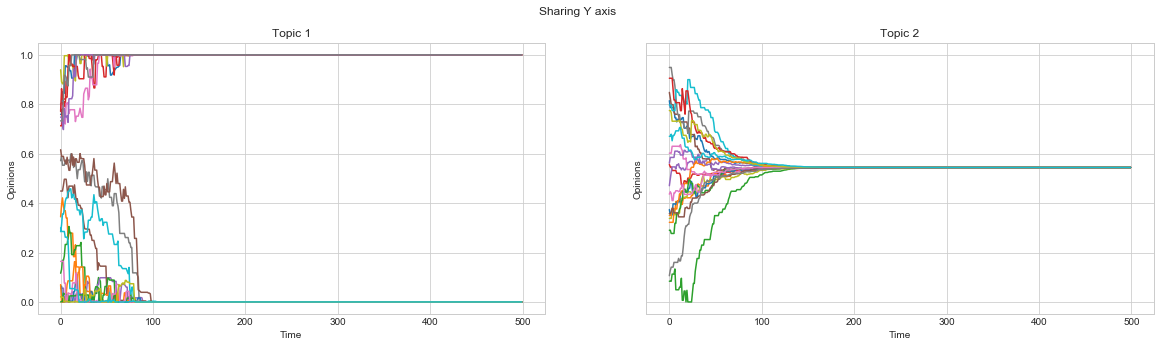

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Sharing Y axis')

ax1.plot(topic1_evolution)
ax1.set_title('Topic 1')
ax1.set(xlabel='Time', ylabel='Opinions')

ax2.plot(topic2_evolution)
ax2.set_title('Topic 2')
ax2.set(xlabel='Time', ylabel='Opinions')

fig.set_size_inches(20,5)
plt.show()